In [1]:
from utils import (
    fusionner_csv,
    somme_marketcap_par_timestamp,
    plot_marketcap,
    remplacer_nan_par_moyenne_mensuelle
)
import pandas as pd

In [2]:
path = '../data/AI'

In [3]:
df = fusionner_csv(path)

In [4]:
df.head()

,snapped_at,price,market_cap,total_volume
0,2022-01-17 00:00:00 UTC,0.237676,0.0,2.723643e+06
1,2022-01-18 00:00:00 UTC,0.237676,0.0,2.723643e+06
2,2022-01-19 00:00:00 UTC,0.185845,0.0,6.445543e+05
3,2022-01-20 00:00:00 UTC,0.251300,0.0,5.533835e+05
4,2022-01-21 00:00:00 UTC,0.449203,0.0,5.263106e+06


In [5]:
df_mc_time = somme_marketcap_par_timestamp(df)

<DatetimeArray>
['2022-01-17 00:00:00', '2022-01-18 00:00:00', '2022-01-19 00:00:00',
 '2022-01-20 00:00:00', '2022-01-21 00:00:00', '2022-01-22 00:00:00',
 '2022-01-23 00:00:00', '2022-01-24 00:00:00', '2022-01-25 00:00:00',
 '2022-01-26 00:00:00',
 ...
 '2019-02-23 00:00:00', '2019-02-24 00:00:00', '2019-02-25 00:00:00',
 '2019-02-26 00:00:00', '2019-02-27 00:00:00', '2019-02-28 00:00:00',
 '2018-01-30 00:05:05', '2018-02-08 00:05:04', '2018-01-30 00:05:26',
 '2018-02-08 00:05:23']
Length: 2756, dtype: datetime64[ns]


/home/sequierh/Documents/data-analysis-crypto/script/utils.py:75: FutureWarning: Parsed string "2022-01-17 00:00:00 U" included an un-recognized timezone "U". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead pass the string without the timezone, then use .tz_localize to convert to a recognized timezone.
  df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')


In [6]:
print(df_mc_time.head())
print('----')
print(df_mc_time.describe())
print('----')
print(df_mc_time.info())


   timestamp  market_cap
0 2016-11-18         0.0
1 2016-11-19         0.0
2 2016-11-20         0.0
3 2016-11-21         0.0
4 2016-11-22         0.0
----
                 timestamp    market_cap
count                 2752  2.752000e+03
mean   2020-08-24 12:00:00  2.110132e+09
min    2016-11-18 00:00:00  0.000000e+00
25%    2018-10-06 18:00:00  9.768620e+07
50%    2020-08-24 12:00:00  3.980106e+08
75%    2022-07-13 06:00:00  2.526747e+09
max    2024-05-31 00:00:00  1.853710e+10
std                    NaN  3.030852e+09
----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2752 entries, 0 to 2751
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   timestamp   2752 non-null   datetime64[ns]
 1   market_cap  2752 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 43.1 KB
None


In [7]:
max(df_mc_time['market_cap'])

18537096879.444103

In [8]:
#df_mc_time = remplacer_nan_par_moyenne_mensuelle(df_mc_time)
df_mc_time

,timestamp,market_cap
0,2016-11-18,0.000000e+00
1,2016-11-19,0.000000e+00
2,2016-11-20,0.000000e+00
3,2016-11-21,0.000000e+00
4,2016-11-22,0.000000e+00
...,...,...
2747,2024-05-27,8.447471e+09
2748,2024-05-28,8.424687e+09
2749,2024-05-29,8.326733e+09
2750,2024-05-30,8.187669e+09


In [9]:
df_nvidia = pd.read_csv('../data/Bourse/nvidia.csv', delimiter=',')

In [10]:
df_nvidia = df_nvidia[df_nvidia['Date'] <= '2024-05-31']

In [11]:
btc = pd.read_csv('../data/Bourse/btc.csv', delimiter=',')
btc = btc[btc['Date'] <= '2024-05-31']

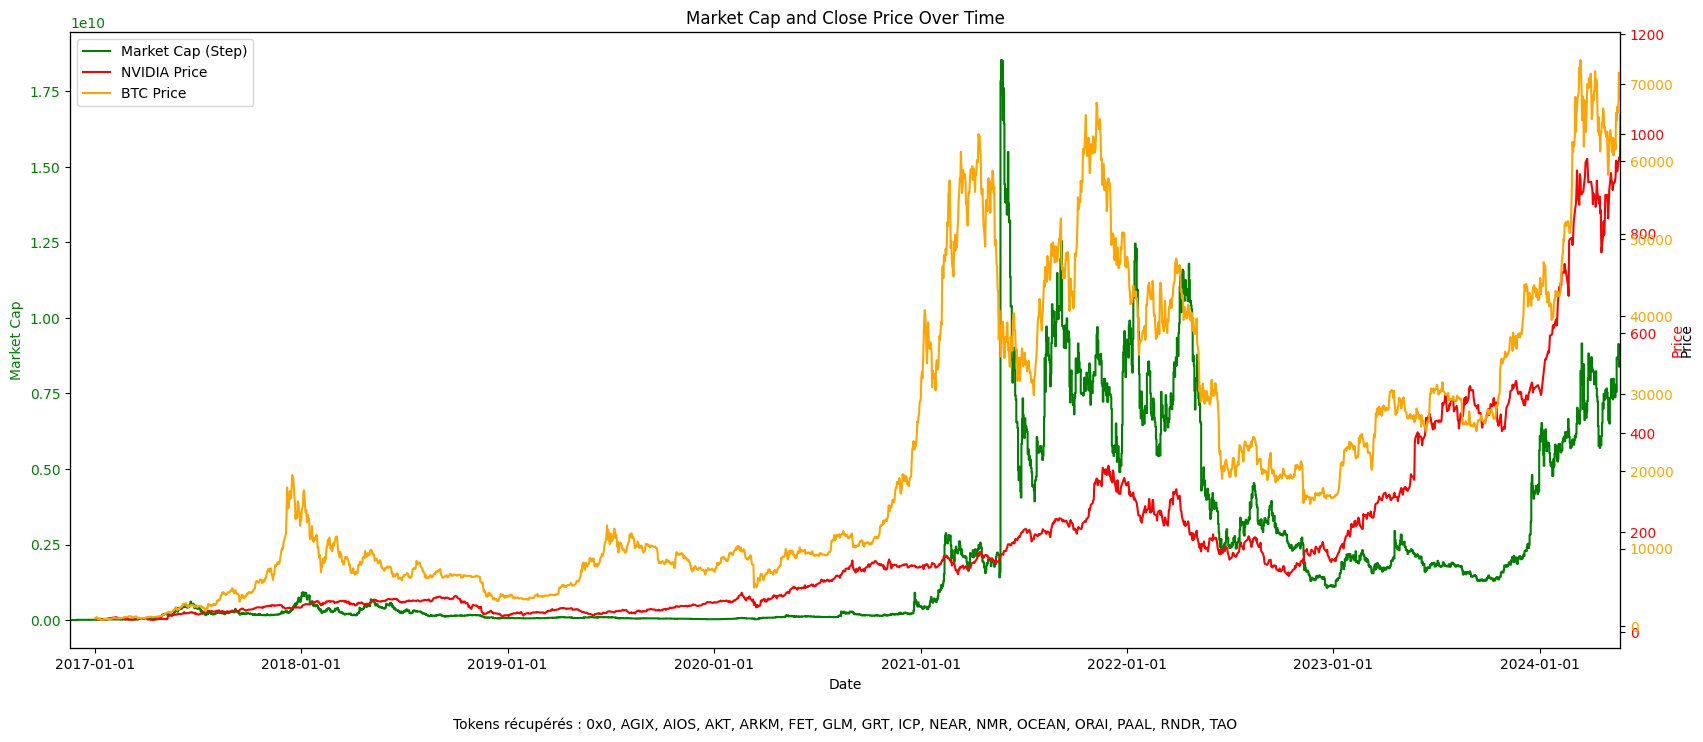

In [12]:
plot_marketcap(df_mc_time, df_nvidia, btc, "Tokens récupérés : 0x0, AGIX, AIOS, AKT, ARKM, FET, GLM, GRT, ICP, NEAR, NMR, OCEAN, ORAI, PAAL, RNDR, TAO")